### Import Libraries

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Normalizer
from scipy.cluster import hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
univ=pd.read_csv('..\\may 5 batch codes\\Data Files\\Universities.csv')
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
univ_df=univ.drop('Univ',axis=1)
univ_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


### Data Understanding

In [4]:
univ.shape

(25, 7)

In [5]:
univ.dtypes

Univ        object
SAT          int64
Top10        int64
Accept       int64
SFRatio      int64
Expenses     int64
GradRate     int64
dtype: object

In [6]:
univ.isna().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

### Data preparation

In [7]:
norm=Normalizer()
univ_df=norm.fit_transform(univ_df)

In [8]:
univdf=pd.DataFrame(univ_df)
univdf.head()

,0,1,2,3,4,5
0,0.057602,0.003913,0.000967,0.000572,0.998323,0.004133
1,0.022252,0.001573,0.000393,0.000094,0.999750,0.001274
2,0.050283,0.002474,0.002355,0.000359,0.998725,0.002873
3,0.041538,0.002410,0.000761,0.000381,0.999130,0.002790
4,0.058443,0.003790,0.001507,0.000594,0.998274,0.004109


### Model Training || Model Testing

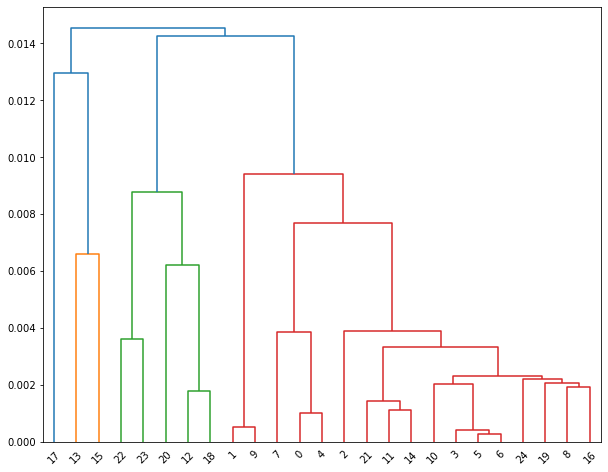

In [9]:
plt.figure(figsize=(10,8))
sch.dendrogram(sch.linkage(y=univ_df, method='single', metric='euclidean'))
plt.show()

In [10]:
hc_model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [11]:
hc_clusters=hc_model.fit_predict(univ_df)
hc_clusters

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 2, 0, 2, 1, 2, 3, 1, 3, 0,
       3, 3, 1], dtype=int64)

In [12]:
#To find the cluster labels
np.unique(hc_clusters)

array([0, 1, 2, 3], dtype=int64)

In [13]:
univ['Clusters']=hc_clusters
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


In [14]:
univ[univ['Clusters']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
0,Brown,1310,89,22,13,22704,94,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
10,MIT,1380,94,30,10,34870,91,0
11,Northwestern,1260,85,39,11,28052,89,0
14,Princeton,1375,91,14,8,30220,95,0


In [15]:
univ[univ['Clusters']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
1,CalTech,1415,100,25,6,63575,81,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1
16,Stanford,1360,90,20,12,36450,93,1
19,UChicago,1290,75,50,13,38380,87,1
24,Yale,1375,95,19,11,43514,96,1


In [16]:
univ[univ['Clusters']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
13,PennState,1081,38,54,18,10185,80,2
15,Purdue,1005,28,90,19,9066,69,2
17,TexasA&M,1075,49,67,25,8704,67,2


In [17]:
univ[univ['Clusters']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Clusters
12,NotreDame,1255,81,42,13,15122,94,3
18,UCBerkeley,1240,95,40,17,15140,78,3
20,UMichigan,1180,65,68,16,15470,85,3
22,UVA,1225,77,44,14,13349,92,3
23,UWisconsin,1085,40,69,15,11857,71,3


### End